# Predicting Heart Disease using ML

This notebook looks into using various Pythin-based machine learning and data science libraries in an attempt ML model capable of wheather or not someone has heart diseases based on their medical attributes

Steps to approach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modeliing
6. Experimentation

## 1. Problem Definition

Given some clinical parameters about patients, can we predict wheather or not they have heart diseases?

## 2. Data
The data came from the Cleaveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation
If we can reach 95% accuracy wheather a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
### Data Dictionary
1. (age): age in years
2. (sex): sex (1 = male; 0 = female)
3. (cp): chest pain type
4. (trestbps): resting blood pressure  (in mm Hg on admission to the hospital)
5. (chol): serum cholestoral in mg/dl
6. (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg): resting electrocardiographic results
8. (thalach): maximum heart rate achieved
9. (exang): exercise induced angina (1 = yes; 0 = no)
10. (oldpeak)= ST depression induced by exercise relative to rest
11. (slope): the slope of the peak exercise ST segment
12. (ca): number of major vessels (0-3) colored by flourosopy
13. (thal): 1 = normal; 2 = fixed defect; 3 = reversable defect
14. (target) (the predicted attribute)

## Preparing the Tools (Pandas, Numpy, Matplotlib)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

#Models from SK Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

#Saving and Exporting the model
import pickle

# Loading the data

In [3]:
df = pd.read_csv("heart_deasease.csv")
df.shape

(303, 14)

## EDA (Exploratory Data Analysis)
1. What questions are we trying to answer?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data & how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of your data?

### Check Eda_Report.html file to see EDA Results

In [ ]:
#Using Pandas Profiling to Creating Automatic Report
profile = ProfileReport(df)
profile.to_file(output_file="EDA_Report.html")

# Heart Disease Frequency according to Sex

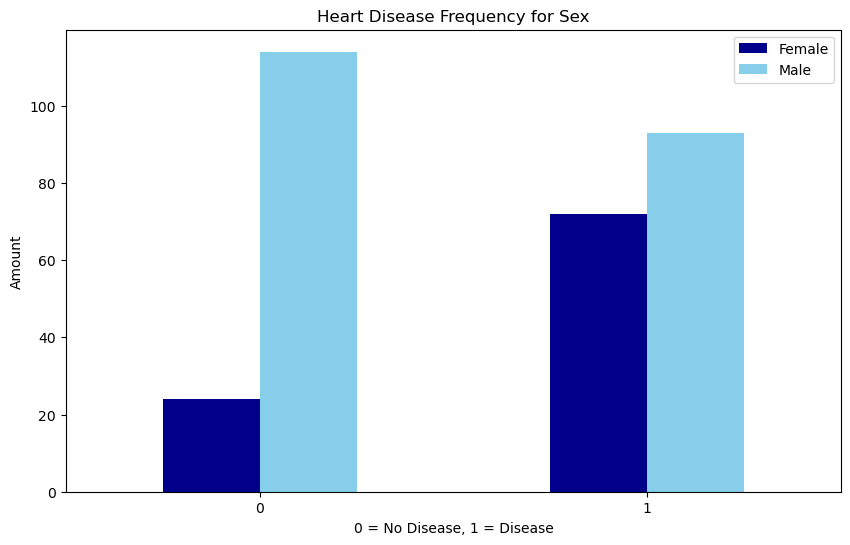

In [4]:
df.sex.value_counts()

# Compare target column to sex column
pd.crosstab(df.target, df.sex)

#Creating a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["darkblue","skyblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

# Age vs. Max Heart Rate for Heart Disease

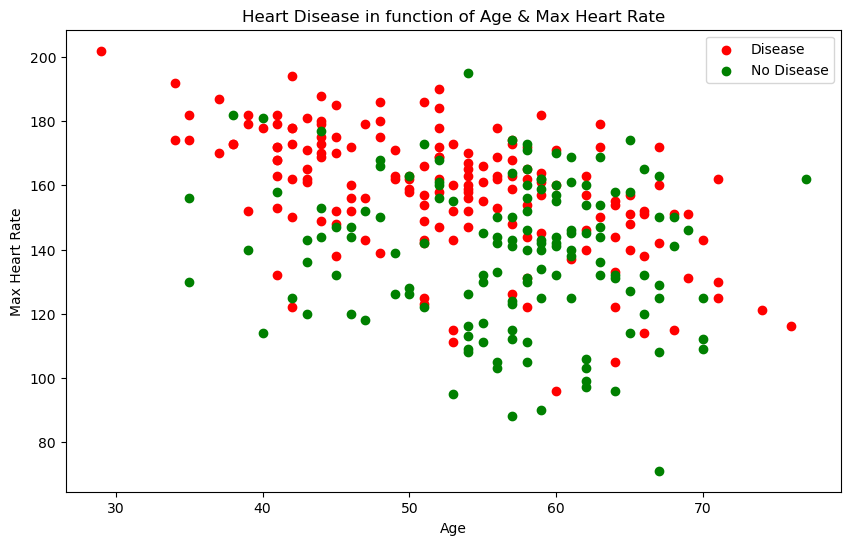

In [5]:
#Creating another figure
plt.figure(figsize=(10,6))

#Scatter with positive axamples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="red")
#Scatter with negative axamples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="green");

#Adding some helpful info
plt.title("Heart Disease in function of Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

### Mostly patients from the age [50-65] have heart problems.

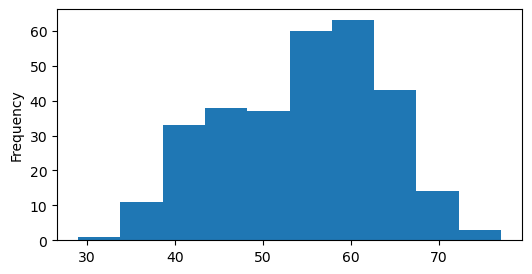

In [6]:
#Chek the distribution of age column with a histogram
df.age.plot.hist(figsize=(6,3));

# Heart Disease frequency per chest pain type

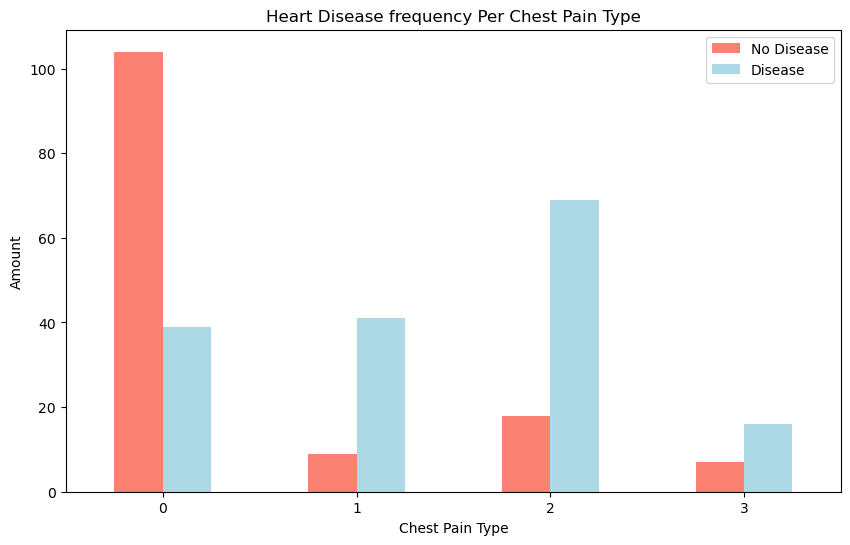

In [7]:
#Making the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

# Features Scaling Using Standardization

In [4]:
scale = StandardScaler()

# Creating dummy cvariables
dataset = pd.get_dummies(df, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])

#Columns to scale down
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale] = scale.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [9]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17,0.544554,0.316832,0.683168,0.471947,0.165017,...,0.468647,0.577558,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,0.547855,0.386139
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,0.498835,0.466011,0.466011,0.500038,0.371809,...,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.236774,0.498528,0.487668
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Choosing the right model based on our problem
### Trying 3 different ML models
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [10]:
#Splitting data into X & y
X = dataset.drop("target", axis=1)
y = dataset["target"]

#Splitting data into training & test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Putting models into dictionary
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}
#Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    #Making dictionary to keep model scores
    model_scores = {}
    #Loop through models
    # Here name = "Key" and model ="Value"
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8688524590163934}

# Model Comparison Based on Accuracy Scores

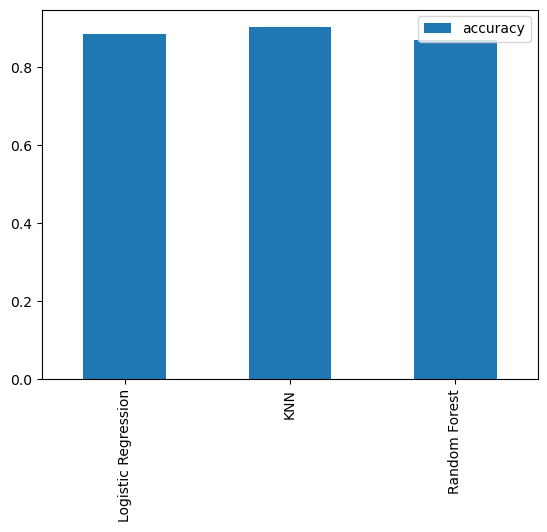

In [12]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Diving Deep into KNN as (accuracy > others)

In [23]:
# Testing the Test datasets
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
accuracy_score(y_test, y_preds)

0.9016393442622951

In [27]:
# Average Accuracy on 10 fold datasets 
score = cross_val_score(knn, X_train, y_train, cv=10)
np.mean(score)

0.8181666666666667

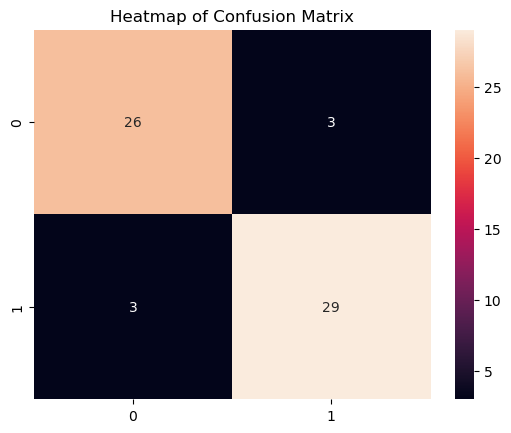

In [32]:
#Confusion Matrix in Heatmap
cm = confusion_matrix(y_test, y_preds)
plt.title("Heatmap of Confusion Matrix")
sns.heatmap(cm, annot=True)
plt.show();

# Classification Report with NO Cross Validation

In [33]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# Classification Report with Cross Validation

In [69]:
#Cross-Validated Accuracy
cv_acc = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
np.mean(cv_acc)

0.8348387096774192

In [44]:
#Cross-Validated Precision
cv_prec = cross_val_score(knn, X, y, cv=10, scoring="precision")
np.mean(cv_prec)

0.8376237161531279

In [45]:
#Cross-Validated Recall
cv_recall = cross_val_score(knn, X, y, cv=10, scoring="recall")
np.mean(cv_recall)

0.8720588235294118

In [46]:
#Cross-Validated Accuracy
cv_f1 = cross_val_score(knn, X, y, cv=10, scoring="f1")
np.mean(cv_f1)

0.8515381558028616

# Visualizing the Cross-Valiadated Matrices

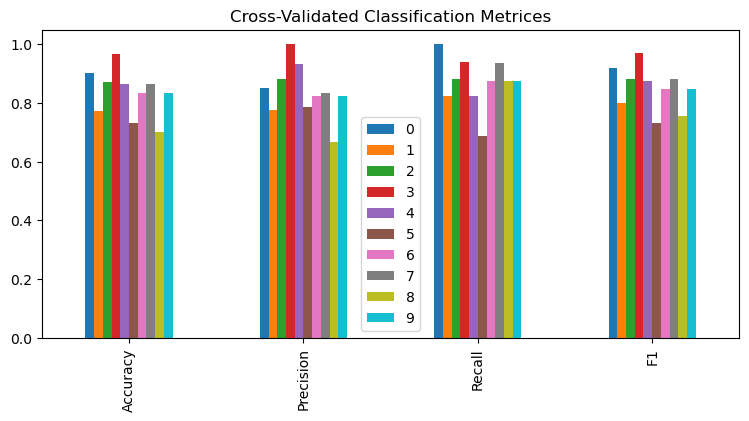

In [50]:
cv_metrices = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall": cv_recall,
                          "F1": cv_f1})
cv_metrices.T.plot.bar(figsize=(9,4), title="Cross-Validated Classification Metrices", legend=True);

# Tuning KNN Model

In [52]:
#Creating a hyperparameter grid for RandomForestClassifier
knn_grids = {"n_neighbors" : [3, 4, 5],
            "weights" : ["uniform","distance"],
            "algorithm" : ["brute","auto"]}
#Random Seed
np.random.seed(42)

#Setup Grid hyperparameter search for KNearestNeighbor
gs_knn = GridSearchCV(knn,
                      param_grid=knn_grids,
                      cv=5,
                      verbose=True)
#Fitting the GridSearch model
gs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['brute', 'auto'],
                         'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [66]:
#Getting Best Parameters & Best Estimators
gs_knn.best_params_, gs_knn.best_estimator_

({'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'uniform'},
 KNeighborsClassifier(algorithm='brute'))

In [59]:
#Predictng with test data using Model with tuned hyperparameters
y_preds_2 = gs_knn.predict(X_test)

In [60]:
accuracy_score(y_test, y_preds_2)

0.9016393442622951

In [71]:
# Average Accuracy of 5 fold splits of data using tuned model
np.random.seed(42)
score_2 = cross_val_score(gs_knn, X, y, cv=5)
np.mean(score_2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


0.831584699453552

# ROC Curve & AUC Score

In [74]:
# Making Predictions using Probabilities
y_probs = gs_knn.predict_proba(X_test)

#Keeping Positive only
y_probs_positive = y_probs[ :,1] #Every Rows but 2nd Column Only
y_probs_positive

#Calculating fpr, tpr and threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)
fpr, tpr, threshold

(array([0.        , 0.03448276, 0.03448276, 0.10344828, 0.17241379,
        0.44827586, 1.        ]),
 array([0.     , 0.53125, 0.75   , 0.90625, 0.96875, 0.96875, 1.     ]),
 array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))

## Function to plot ROC Curve

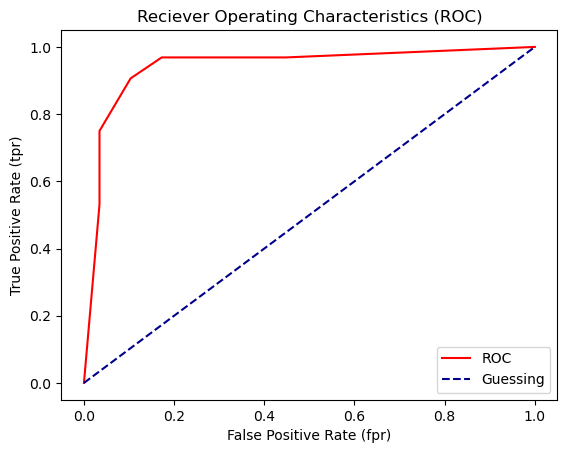

The AUC Score is 0.9412715517241379


In [83]:
def plot_roc_curve (fpr,tpr):
    #Plotting roc curve
    plt.plot(fpr, tpr, color="red", label="ROC")
    
    #Plot line with no Predictive power (Baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customizing the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Reciever Operating Characteristics (ROC)")
    plt.legend()
    plt.show()
  
plot_roc_curve(fpr, tpr)

#Checking AUC Score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_probs_positive)
print(f"The AUC Score is {auc}")

In [84]:
model = pickle.dump(gs_knn, open("model.pkl","wb"))
model

### Exporting the modified/Scaled dataset to be used while deploying the model.

In [5]:
dataset.to_csv(r'C:\Users\bhaga\Desktop\Sample_Project\Projects\Heart_Disease\New_Edited_file.csv', index= False, header=True)

## Final Accuracy of the model

In [102]:
marks = accuracy_score(y_test, y_preds_2)
print(f"The highest accuracy achieved by this KNN Model is {marks * 100:.2f} %")

The highest accuracy achieved by this KNN Model is 90.16 %
